# Records of Commuter Journeys

## (a) In the dataset, ‘-’, ‘--’, and ‘?’ are considered as missing values, and the variable columns of the dataset are noted as in the data dictionary in order. As part of data preparation, read the dataset in as a Pandas dataframe, with the above considerations. 

In [45]:
import pandas as pd

In [46]:
df = pd.read_csv('GBA_data.csv',low_memory=False)

In [47]:
df.head()
df.isnull().sum()


origin         504
destination    504
start            0
end              0
id               0
type             0
subscriber       0
yob              0
age              0
gender           0
dtype: int64

In [27]:
df.describe()

,origin,destination,id
count,669505.000000,669505.000000,670009.000000
mean,113.350947,111.389453,2174.952754
std,94.125066,93.750900,1183.285391
min,3.000000,3.000000,11.000000
25%,31.000000,30.000000,1177.000000
50%,84.000000,81.000000,2265.000000
75%,178.000000,178.000000,3188.000000
max,356.000000,356.000000,4307.000000


In [28]:
print(df.info())
df.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 670009 entries, 0 to 670008
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   origin       669505 non-null  float64
 1   destination  669505 non-null  float64
 2   start        670009 non-null  object 
 3   end          670009 non-null  object 
 4   id           670009 non-null  int64  
 5   type         670009 non-null  object 
 6   subscriber   670009 non-null  object 
 7   yob          670009 non-null  object 
 8   age          670009 non-null  object 
 9   gender       670009 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 51.1+ MB
None


(670009, 10)

## (b) Identify the variable columns which have missing values. As part of data preparation, implement ways to treat them, and explain your rationale. State any interesting observation(s). 

In [29]:
df['origin'] = df['origin'].astype('object')
df['destination'] = df['destination'].astype('object')
df['id'] = df['id'].astype('object')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 670009 entries, 0 to 670008
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   origin       669505 non-null  object
 1   destination  669505 non-null  object
 2   start        670009 non-null  object
 3   end          670009 non-null  object
 4   id           670009 non-null  object
 5   type         670009 non-null  object
 6   subscriber   670009 non-null  object
 7   yob          670009 non-null  object
 8   age          670009 non-null  object
 9   gender       670009 non-null  object
dtypes: object(10)
memory usage: 51.1+ MB


In [31]:
#get the details of missing values containing columns
columns_of_dataset = df.columns.values.tolist()
missing_values_column = []
for i in columns_of_dataset:
    for cell in df[str(i)]:
        if ((cell == '-') or (cell == '--') or (cell == '?')):
            print(i,cell)
            missing_values_column.append(i)
            break
missing_values_column

type ?
yob --
age --
gender -


['type', 'yob', 'age', 'gender']

In [32]:
#now clean the data, remove the lines which have the missing values
df = df[df.yob != '--']
# df = df[df.type != '?']
df = df[df.gender != '-']

In [33]:
# interesting observation(s).
#now there is no known missing values present in dataset
#get the details of missing values containing columns, if any after removing the missing values row
columns_of_dataset = df.columns.values.tolist()
missing_values_column = []
for i in columns_of_dataset:
    for cell in df[str(i)]:
        if ((cell == '-') or (cell == '--') or (cell == '?')):
            print(i,cell)
            missing_values_column.append(i)
            break
missing_values_column

type ?


['type']

## (c) As part of data preparation, identify three (3) other data quality issues in the data. Similarly, suggest and implement ways to treat them, and explain your rationale. 


In [34]:
#first data quality issue 
#as we clean the data based on missing value, but the cleaning process is not done yet
#following command will show the null value containing in the column
df.isnull().sum()

origin         504
destination    504
start            0
end              0
id               0
type             0
subscriber       0
yob              0
age              0
gender           0
dtype: int64

In [35]:
# solution for first quality issue 
# based on above information now we have to remove the null value rows because the dataset to ensure the quality of dataset
df = df[df.origin.notnull()]
df = df[df.destination.notnull()]
# now runing the below command while ensure that no null value is present now in dataset, 
# dataset is fully qualified based on no null values

df.isnull().sum()

origin         0
destination    0
start          0
end            0
id             0
type           0
subscriber     0
yob            0
age            0
gender         0
dtype: int64

In [36]:
#second data quality issue
#column are not charaterized on the based of data type(it should be use for data visualization later)
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 669492 entries, 0 to 670007
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   origin       669492 non-null  object
 1   destination  669492 non-null  object
 2   start        669492 non-null  object
 3   end          669492 non-null  object
 4   id           669492 non-null  object
 5   type         669492 non-null  object
 6   subscriber   669492 non-null  object
 7   yob          669492 non-null  object
 8   age          669492 non-null  object
 9   gender       669492 non-null  object
dtypes: object(10)
memory usage: 56.2+ MB


In [37]:
#solution for second data quality issue
#changing the datatype based on column properties

df['origin'] = df['origin'].astype('int64')
df['destination'] = df['destination'].astype('int64')
df['start'] = df['start'].astype('object')
df['end'] = df['end'].astype('object')
df['id'] = df['id'].astype('int64')
df['type'] = df['type'].astype('object')
df['subscriber'] = df['subscriber'].astype('object')
df['yob'] = df['yob'].astype('int64')
df['age'] = df['age'].astype('int64')
df['gender'] = df['gender'].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 669492 entries, 0 to 670007
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   origin       669492 non-null  int64 
 1   destination  669492 non-null  int64 
 2   start        669492 non-null  object
 3   end          669492 non-null  object
 4   id           669492 non-null  int64 
 5   type         669492 non-null  object
 6   subscriber   669492 non-null  object
 7   yob          669492 non-null  int64 
 8   age          669492 non-null  int64 
 9   gender       669492 non-null  object
dtypes: int64(5), object(5)
memory usage: 56.2+ MB


In [38]:
# third data quality issue
#origin should not equal to destination and start time should not equal to end.
res = []
for i, j in zip(df['origin'], df['destination']):
    if i == j:
        res.append(i)

#these are not good data so we should remove it, because it is faulty data
print("total number of orgin and destinaion are equal in",len(res),"enteries")


total number of orgin and destinaion are equal in 14686 enteries


In [39]:
#solution for third dta quality issue
#origin should not equal to destination and same like start time should not be equal to end time
df = df[df.destination != df.origin]
df = df[df.start != df.end]

res = []
for i, j in zip(df['origin'], df['destination']):
    if i == j:
        res.append(i)

#these are not good data so we should remove it, because it is faulty data
print("total number of orgin and destinaion are equal in",len(res),"enteries")

total number of orgin and destinaion are equal in 0 enteries


In [40]:
#rationale
df.describe()

,origin,destination,id,yob,age
count,654806.000000,654806.000000,654806.000000,654806.000000,654806.000000
mean,112.895641,110.890502,2171.684216,1982.265573,37.734427
std,93.901298,93.507778,1181.318469,9.843260,9.843260
min,3.000000,3.000000,11.000000,1949.000000,20.000000
25%,30.000000,30.000000,1176.000000,1977.000000,31.000000
50%,84.000000,81.000000,2262.000000,1984.000000,36.000000
75%,178.000000,176.000000,3182.000000,1989.000000,43.000000
max,356.000000,356.000000,4307.000000,2000.000000,71.000000


##  (d) Develop a user-defined function that will print the hour, expressed in the 12-hour clock format (e.g., 12am, 1pm), whereby the highest number of commuters start their journey. 


In [41]:
from datetime import datetime
# user-defined function
def convert_time1(x):
    return datetime.strptime(x, "%Y-%m-%d %H:%M:%S.%f").strftime("%I %p")


In [42]:
modDfObj = df['start'].apply(convert_time1)
data_commuter = {}
for i in modDfObj:
    data_commuter[str(i)] = 0
for i in modDfObj:
    data_commuter[str(i)] = data_commuter[str(i)] + 1
data_commuter

{'12 AM': 3170,
 '01 AM': 1511,
 '02 AM': 961,
 '03 AM': 625,
 '05 AM': 3093,
 '06 AM': 12364,
 '07 AM': 37940,
 '08 AM': 78063,
 '09 AM': 59656,
 '10 AM': 29366,
 '11 AM': 26333,
 '12 PM': 30095,
 '01 PM': 28766,
 '02 PM': 26843,
 '03 PM': 32177,
 '04 PM': 50182,
 '05 PM': 81126,
 '06 PM': 61385,
 '07 PM': 36205,
 '08 PM': 22474,
 '09 PM': 15676,
 '10 PM': 10069,
 '11 PM': 5906,
 '04 AM': 820}

In [43]:
#get the heighest number of commuters start their journey
prev__ = 0
next__ = 0
for k, v in data_commuter.items():
    perv__ = v
    if perv__ > next__:
        next__ = perv__
        key_ = k
key_ = key_.replace("0","")
print(f"highest number of commuters start their journey at {key_}  ")

highest number of commuters start their journey at 5 PM  


## (e) Write a Python code to create appropriate visualisations of the commuter data. Analyse the results and then discuss three (3) interesting insights. 

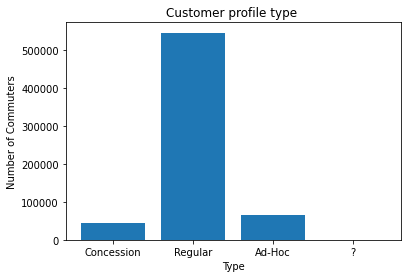

In [44]:
#chart 1 Customer profile type  vs Number of Commuters
import matplotlib.pyplot as plt
type_data = {}
for i  in df['type']:
    type_data[str(i)] = 0
    
for i  in df['type']:
    type_data[str(i)] = type_data[str(i)] + 1

type_data
plt.title('Customer profile type ')
plt.xlabel('Type')
plt.ylabel('Number of Commuters')
type_data_names = list(type_data.keys())
type_data_values = list(type_data.values())
plt.bar(range(len(type_data)), type_data_values, tick_label=type_data_names)
plt.show()

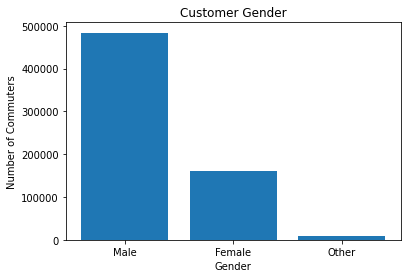

In [22]:
#chart 2 Customer Gender  vs Number of Commuters
type_data = {}
for i  in df['gender']:
    type_data[str(i)] = 0
    
for i  in df['gender']:
    type_data[str(i)] = type_data[str(i)] + 1

type_data
type_data_names = list(type_data.keys())
type_data_values = list(type_data.values())
plt.title('Customer Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Commuters')
plt.bar(range(len(type_data)), type_data_values, tick_label=type_data_names)
plt.show()

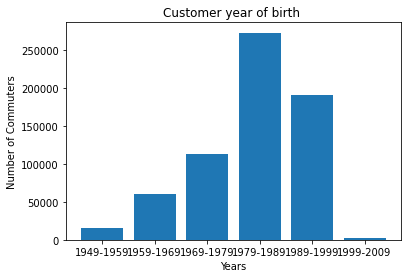

In [23]:
#chart 3 Customer year of birth  vs Number of Commuters
type_data = {'1949-1959':0,'1959-1969':0,'1969-1979':0,'1979-1989':0,'1989-1999':0,'1999-2009':0}
for i  in df['yob']:
    if i < 1959:
        type_data[str('1949-1959')] = type_data[str('1949-1959')] + 1
    elif ((i >=1959) and (i<1969)):
        type_data[str('1959-1969')] = type_data[str('1959-1969')] + 1
    elif ((i >=1969) and (i<1979)):
        type_data[str('1969-1979')] = type_data[str('1969-1979')] + 1
    elif ((i >=1979) and (i<1989)):
        type_data[str('1979-1989')] = type_data[str('1979-1989')] + 1
    elif ((i >=1989) and (i<1999)):
        type_data[str('1989-1999')] = type_data[str('1989-1999')] + 1
    elif ((i >=1999) and (i<2009)):
        type_data[str('1999-2009')] = type_data[str('1999-2009')] + 1

type_data
type_data_names = list(type_data.keys())
type_data_values = list(type_data.values())
plt.title('Customer year of birth ')
plt.xlabel('Years')
plt.ylabel('Number of Commuters')
plt.bar(range(len(type_data)), type_data_values, tick_label=type_data_names)
plt.show()
          

In [1]:
#...